## L1 (Lasso) and L2 (Ridge) Regularization

Regularization is a technique that prevents the parameters of a model from becoming too large, and "shrinks" them towards zero. The impact of regularization is that it results in models that, when making predictions on new data, have less variance.

Three particularly well-known and commonly used regularization techniques for linear models are:
* ridge regression
* least absolute shrinkage and selection operator (LASSO)
* elastic net

These three techniques can be thought of as extensions to linear models that reduce overfitting. Because they shrink model parameters towards zero, they can also automatically perform feature selection by forcing predictors with little information to have no or negligible impact on predictions.

### Examples of Underfit vs. Optimal vs. Overfit

When we underfit the data, we miss local differences in relationship and produce a model that has high bias.

When we overfit the data, our model is too sensitive to local differences in the relationship and produce a model that has high variance.

![Underfit Optimal Overfit](./images/underfit-optimal-overfit.png)
![Underfit Optimal Overfit 2](./images/underfit-optimal-overfit2.png)

The principal job of regularization is to prevent algorithms from learning models that are overfit by discouraging complexity. This is achieved by penalizing model parameters that are large, shrinking them towards zero.

### Ridge Regression

In ridge regression, the cost function for OLS is altered by adding a penalty equivalent to square of the magnitude of the parameters (coefficients). The added term makes the function's value larger, the larger the coefficient estimates are. As a result, in order to minimize the output of the cost function, optimization algorithm has to balance selecting the model parameters that minimze the sum of squares, and selecting parameters that minimize the penalty term.

__Note!__ Intercept is excluded from the regularization term.

$$\Large J(W)=\sum^M_{i=1}(y_i-\hat{y_i})^2+\lambda\sum^p_{j=1}{w_j^2}$$

The penalty term is controlled by value __lambda__, $\lambda$. Large values of lambda strongly penalize model complexity, while small values of lambda weakly penalize model complexity. If we set lambda to 0, this removes the L2 penalty term from the equation and we get back to the OLS loss function.

### LASSO

The cost function for LASSO can be written as

$$\Large J(W)=\sum^M_{i=1}(y_i-\hat{y_i})^2+\lambda\sum^p_{j=1}{\lvert{w_j}\rvert}$$

L1 regularization can lead to zero coefficients. So LASSO regression not only helps in reducing over-fitting but it helps with feature selection.

__Note!__ Do not use L1 or L2 regularization for univariate regressions.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [2]:
boston = load_boston()
data = pd.DataFrame(boston['data'], columns=boston['feature_names'])
data['MEDV'] = boston.target

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
correlations = data.corr()

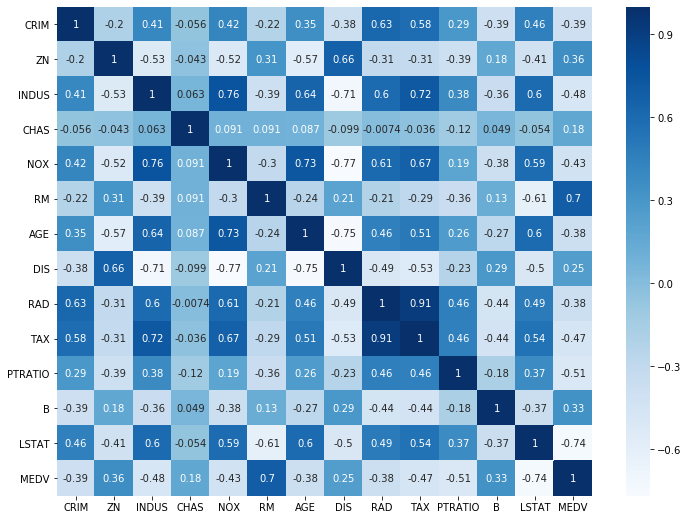

In [6]:
plt.figure(figsize=(12, 9))
sns.heatmap(correlations, annot=True, cmap='Blues')

In [99]:
correlations['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [40]:
scaler = StandardScaler()

In [96]:
# First, let's standardize independent variables
scaled_data = pd.DataFrame(scaler.fit_transform(data.drop('MEDV', axis=1)),
                           columns=data.drop('MEDV', axis=1).columns)

In [97]:
x = scaled_data
y = data['MEDV']

## Ridge Regression

In [183]:
cols = x.columns.tolist()
cols.append('R2')

In [188]:
ridge_coefs = pd.DataFrame(data=[], columns=cols)
lambdas = [30, 10, 1, 0.01, 0.001]
index = []

for l in lambdas:
    rr = Ridge(l).fit(x, y)
    ridge_coefs = ridge_coefs.append(pd.DataFrame(data=[np.append(rr.coef_, rr.score(x, y))], columns=cols))
    index.append(r'$\lambda$={}'.format(l))

ridge_coefs.index = index

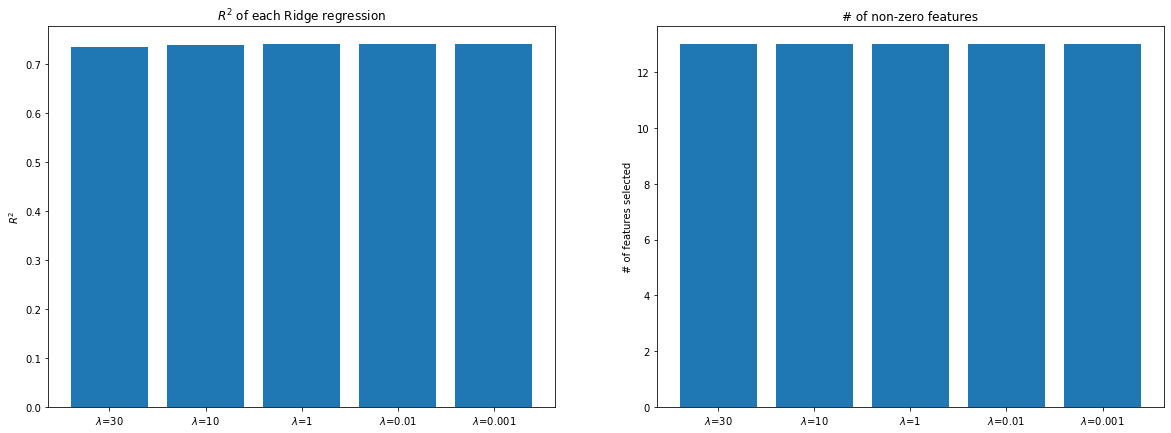

In [189]:
plt.figure(figsize=(20, 7))

plt.subplot(121)
plt.bar(ridge_coefs.index, ridge_coefs['R2'])
plt.ylabel(r'$R^2$') # R-squared
plt.title(r'$R^2$ of each Ridge regression')

plt.subplot(122)
plt.bar(ridge_coefs.index, (ridge_coefs != 0).sum(axis=1) - 1)
plt.ylabel('# of features selected')
plt.title('# of non-zero features')
plt.show()

In [190]:
ridge_coefs

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,R2
$\lambda$=30,-0.774402,0.798918,-0.220738,0.731767,-1.474370,2.807303,-0.092810,-2.468756,1.482250,-1.070042,-1.881456,0.832833,-3.429161,0.736059
$\lambda$=10,-0.859051,0.954975,-0.041327,0.707780,-1.812611,2.742344,-0.032383,-2.856756,2.097823,-1.565395,-1.987751,0.844709,-3.623942,0.739781
$\lambda$=1,-0.919871,1.066461,0.117385,0.685127,-2.029010,2.682754,0.013158,-3.077340,2.591538,-2.010558,-2.052385,0.848848,-3.730666,0.740630
$\lambda$=0.01,-0.928061,1.081414,0.140657,0.681775,-2.056437,2.674318,0.019401,-3.103775,2.661490,-2.076098,-2.060523,0.849264,-3.743496,0.740643
$\lambda$=0.001,-0.928138,1.081553,0.140876,0.681743,-2.056690,2.674239,0.019460,-3.104017,2.662145,-2.076713,-2.060598,0.849268,-3.743614,0.740643


## Lasso Regression

In [186]:
lasso_coefs = pd.DataFrame(data=[], columns=cols)
lambdas= [5, 2, 1, 0.8, 0.01, 0.001]
index = []
for l in lambdas:
    ls = Lasso(l).fit(x, y)
    lasso_coefs = lasso_coefs.append(pd.DataFrame(data=[np.append(ls.coef_, ls.score(x, y))], columns=cols))
    index.append(r'$\lambda$={}'.format(l))

lasso_coefs.index = index

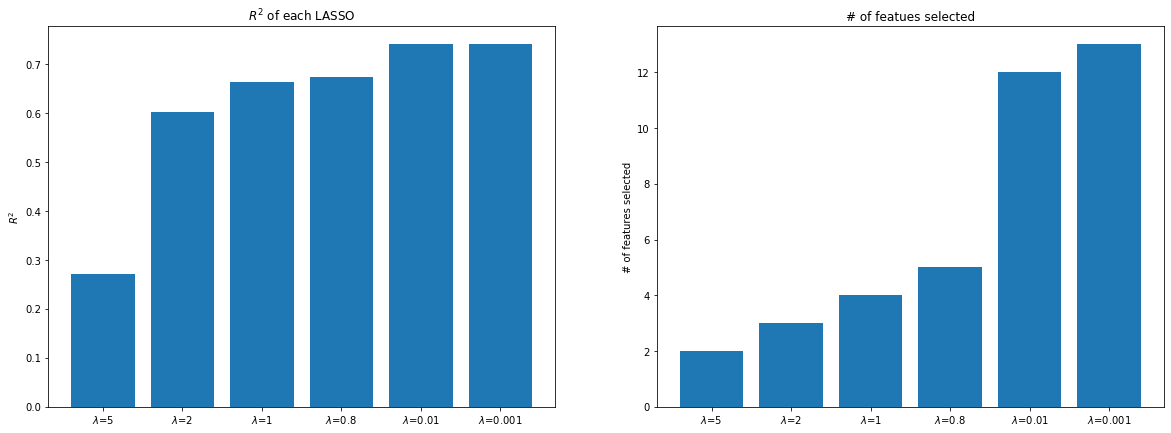

In [187]:
plt.figure(figsize=(20, 7))
plt.subplot(121)
plt.bar(lasso_coefs.index, lasso_coefs['R2'])
plt.ylabel(r'$R^2$') # R-squared
plt.title(r'$R^2$ of each LASSO')

plt.subplot(122)
plt.bar(lasso_coefs.index, (lasso_coefs != 0).sum(axis=1) - 1)
plt.ylabel('# of features selected')
plt.title('# of featues selected')
plt.show()

In [191]:
lasso_coefs

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,R2
$\lambda$=5,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.477937,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-1.484292,0.271556
$\lambda$=2,-0.000000,0.000000,-0.000000,0.000000,-0.000000,2.195459,-0.000000,0.000000,-0.000000,-0.000000,-0.700049,0.000000,-3.168213,0.602861
$\lambda$=1,-0.000000,0.000000,-0.000000,0.000000,-0.000000,2.713355,-0.000000,-0.000000,-0.000000,-0.000000,-1.343549,0.180957,-3.543381,0.662819
$\lambda$=0.8,-0.000000,0.000000,-0.000000,0.168076,-0.000000,2.823759,-0.000000,-0.000000,-0.000000,-0.000000,-1.446124,0.329190,-3.573916,0.674754
$\lambda$=0.01,-0.900245,1.035916,0.046924,0.684152,-1.980551,2.687312,0.000000,-3.058301,2.481844,-1.899442,-2.038645,0.839724,-3.730874,0.740562
$\lambda$=0.001,-0.925348,1.076739,0.131471,0.682060,-2.048349,2.675950,0.015049,-3.100300,2.643836,-2.058853,-2.058263,0.848414,-3.741514,0.740642
